In [168]:
#importación de librerias

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score

In [169]:
# Carga del dataset
df = pd.read_csv('weatherAUS.csv')

# Ver primeras filas
print(df.head())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

In [170]:
print("Ubicaciones únicas:", sorted(df['Location'].unique()))
print("Cantidad de ubicaciones únicas:", df['Location'].nunique())

Ubicaciones únicas: ['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek', 'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar', 'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart', 'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport', 'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle', 'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF', 'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale', 'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville', 'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia', 'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera']
Cantidad de ubicaciones únicas: 49


In [171]:
print(df['Location'].value_counts())

Location
Canberra            3436
Sydney              3344
Adelaide            3193
Darwin              3193
Hobart              3193
Perth               3193
Melbourne           3193
Brisbane            3193
Albury              3040
MountGinini         3040
GoldCoast           3040
Wollongong          3040
MountGambier        3040
Launceston          3040
AliceSprings        3040
Albany              3040
Townsville          3040
Bendigo             3040
Cairns              3040
Ballarat            3040
Penrith             3039
Newcastle           3039
Tuggeranong         3039
PerthAirport        3009
Williamtown         3009
Cobar               3009
BadgerysCreek       3009
SydneyAirport       3009
Richmond            3009
Moree               3009
CoffsHarbour        3009
NorfolkIsland       3009
WaggaWagga          3009
Witchcliffe         3009
Watsonia            3009
Dartmoor            3009
Portland            3009
Sale                3009
MelbourneAirport    3009
Mildura         

In [172]:
# Dimensiones
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

# Información general y resumen estadístico
df.info()
print(df.describe(include='all'))

Filas: 145460, Columnas: 23
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  C

In [173]:
# Valores nulos por columna
print(df.isnull().sum())

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [174]:
# Se lee dataset con coordenadas y se mergea para asociar cada ciudad a su lat y long
df_coords = pd.read_csv('weatherAUS-geo-coordinates.csv')  # Asegúrate del nombre correcto del archivo

df = df.merge(df_coords, left_on='Location', right_on='city', how='left')
df = df.drop(columns=['city'])
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,latitude,longitude
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,-36.080780,146.916473
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,-36.080780,146.916473
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,-36.080780,146.916473
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,-36.080780,146.916473
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,-36.080780,146.916473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,-24.485318,130.928669
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,-24.485318,130.928669
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,-24.485318,130.928669
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,-24.485318,130.928669


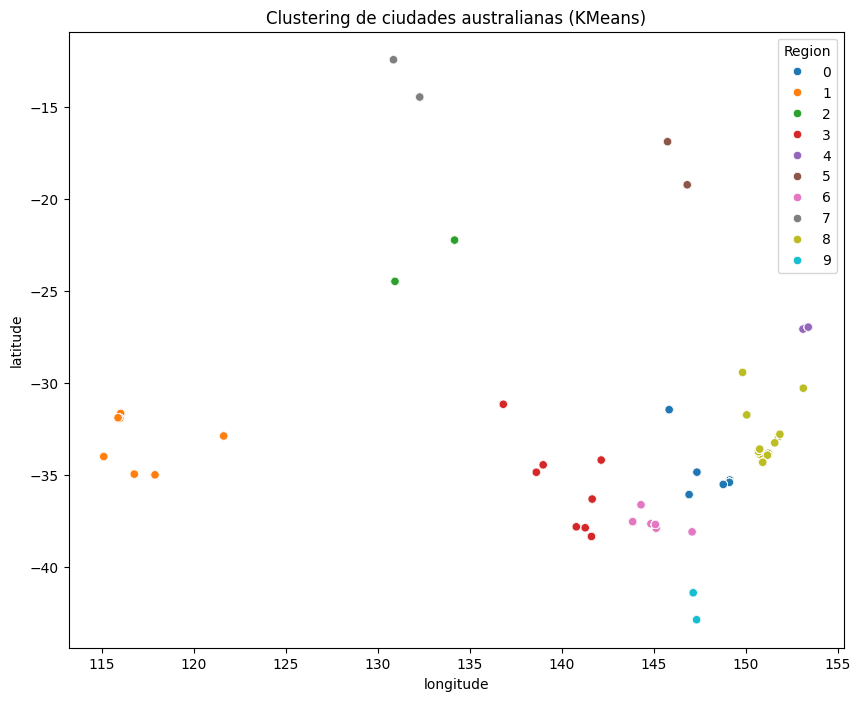

In [175]:
from sklearn.cluster import KMeans

X = df[['latitude', 'longitude']]
n_clusters = 10  # Elige el número según lo que observes en el gráfico
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Region'] = kmeans.fit_predict(X)

# Visualización
plt.figure(figsize=(10,8))
sns.scatterplot(x='longitude', y='latitude', hue='Region', data=df, palette='tab10')
plt.title('Clustering de ciudades australianas (KMeans)')
plt.show()

In [176]:
# Lista de variables a contar nulos
variables_numericas = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
    'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
    'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
    'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'
]

# Contar nulos en cada variable
nulos = df[variables_numericas].isnull().sum()
print(nulos)

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64


In [177]:
# Imputacion de nan en variables numéricas por la mediana del mismo día y región
# Utilizamos la mediana ya que los datos meteorológicos suelen presentar distribuciones asimétricas y eventos extremos que afectan la media
for var in variables_numericas:
    grouped_median = df.groupby(['Region', 'Date'])[var].transform('median')
    df.loc[df[var].isnull(), var] = grouped_median[df[var].isnull()]

In [178]:
# Contar nulos en cada variable
nulos = df[variables_numericas].isnull().sum()
print(nulos)

MinTemp             2
MaxTemp             7
Rainfall           23
Evaporation      1283
Sunshine         4637
WindGustSpeed     392
WindSpeed9am       10
WindSpeed3pm        7
Humidity9am         4
Humidity3pm         9
Pressure9am         3
Pressure3pm         4
Cloud9am         3733
Cloud3pm         3783
Temp9am             1
Temp3pm             4
dtype: int64


In [179]:
# Para poder imputar mejor los nan, creamos la variable Season ya que las variables meteorológicas tienen patrones estacionales
df['Date'] = pd.to_datetime(df['Date'])

def get_season(dt):
    month = dt.month
    # Estaciones para el hemisferio sur
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    elif month in [9, 10, 11]:
        return 'Spring'

df['Season'] = df['Date'].apply(get_season)

In [180]:
# Imputación por mediana de Región para los nan que sigue habiendo
for var in variables_numericas:
    grouped_region_season_median = df.groupby(['Region', 'Season'])[var].transform('median')
    df.loc[df[var].isnull(), var] = grouped_region_season_median[df[var].isnull()]

In [181]:
# Contar nulos en cada variable
nulos = df[variables_numericas].isnull().sum()
print(nulos)

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64


In [182]:
# Lista de variables a contar nulos
variables_categoricas = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

# Contar nulos en cada variable
nulos = df[variables_categoricas].isnull().sum()
print(nulos)

WindGustDir    10326
WindDir9am     10566
WindDir3pm      4228
dtype: int64


In [183]:
# Imputacion de nan de variables categoricas por la Moda (ya que nos parece mas adecuado para las cat) del mismo día y región
for var in variables_categoricas:
    # Moda por Región y Date (el valor más frecuente)
    grouped_mode = df.groupby(['Region', 'Date'])[var].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    df.loc[df[var].isnull(), var] = grouped_mode[df[var].isnull()]

In [184]:
# Contar nulos en cada variable
nulos = df[variables_categoricas].isnull().sum()
print(nulos)

WindGustDir    393
WindDir9am     206
WindDir3pm      12
dtype: int64


In [185]:
# Imputación por moda de Región y Season para los nan que sigue habiendo
for var in variables_categoricas:
    # Moda por Región y Season (el valor más frecuente)
    grouped_mode = df.groupby(['Region', 'Season'])[var].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    df.loc[df[var].isnull(), var] = grouped_mode[df[var].isnull()]

In [186]:
# Contar nulos en cada variable
nulos = df[variables_categoricas].isnull().sum()
print(nulos)

WindGustDir    0
WindDir9am     0
WindDir3pm     0
dtype: int64


In [187]:
# Valores nulos por columna
print(df.isnull().sum())

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday        3261
RainTomorrow     3267
latitude            0
longitude           0
Region              0
Season              0
dtype: int64


In [66]:
# Crear variables dummies para la columna 'Region'
df = pd.get_dummies(df, columns=['Region'], prefix='Region')

# Visualizar las primeras filas con las nuevas variables dummies
print(df.head())

KeyError: 'Region'

In [55]:
df.drop(columns=['Location','latitude', 'longitude'], inplace=True)